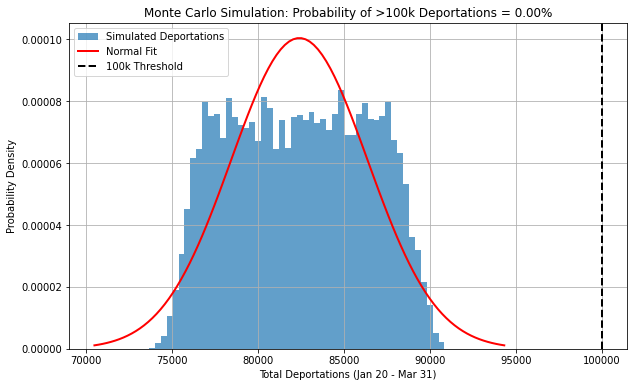

0.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_simulations = 10000  
days_in_period = 71 

mean_rate = 1255 
std_dev = 100  

# Simulate deportations over 71 days.
simulated_totals = np.random.normal(loc=mean_rate, scale=std_dev, size=(num_simulations, days_in_period))
simulated_totals = np.sum(simulated_totals, axis=1)  # Summing deportations over the entire period.

# Adjust for legal bottlenecks (10-15% reduction in some scenarios).
legal_bottleneck_factor = np.random.uniform(0.85, 1.0, num_simulations) 
adjusted_totals = simulated_totals * legal_bottleneck_factor

# Probability of exceeding 100,000 deportations.
prob_exceed_100k = np.mean(adjusted_totals > 100_000)

plt.figure(figsize=(10, 6))
plt.hist(adjusted_totals, bins=50, alpha=0.7, density=True, label="Simulated Deportations")

# Plot normal distribution fit
mu, sigma = np.mean(adjusted_totals), np.std(adjusted_totals)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2, label="Normal Fit")

plt.axvline(100_000, color='k', linestyle='dashed', linewidth=2, label="100k Threshold")
plt.xlabel("Total Deportations (Jan 20 - Mar 31)")
plt.ylabel("Probability Density")
plt.title(f"Monte Carlo Simulation: Probability of >100k Deportations = {prob_exceed_100k:.2%}")
plt.legend()
plt.grid(True)

plt.show()

prob_exceed_100k